In [4]:
import sys 
sys.path.append("..") 
import os

import numpy as np
from braiding_model import BraidOperator, show_braid_words
from braiding_model import GeneratorBraid, obtain_model_braid, obtain_model_torus_knot
from braiding_model import sigma_z, sigma_x, sigma_y, sigma_0
from braiding_model import PerturbationModel

from machine_learning import Classifier, Cluster
from topology import topology_comparator, similarity_function
from functools import partial

import matplotlib.pyplot as plt
import itertools

p1 = PerturbationModel()
p1.set_parameters(t1=0.1,t2=0.0)

p2 = PerturbationModel()
p2.set_parameters(t1=-0.1,t2=0.0)

p3 = PerturbationModel()
p3.set_parameters(t1=0.1,t2=0.1)

p4 = PerturbationModel()
p4.set_parameters(t1=0.0,t2=-0.1)

perturbations = [p1,p2,p3,p4]

np.seterr(all="ignore") # ignore some numerical errors

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

# Artin's topological equivalent conditions

Generate structures that can test the Artin's topological equivalent conditions

In [26]:
n_band = 5
braid_operator_list = [
    BraidOperator(1), BraidOperator(3),
    BraidOperator(2), BraidOperator(-4),
    BraidOperator(1)
]
model0 = obtain_model_braid(n_band=n_band, braid_operators=braid_operator_list)

show_braid_words(model0.get_braid_words())

model0.save_band('./figs/Artin/model0_band.txt')

$\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_3$ $\sigma_1$ 

# Test 1

In [8]:
n_operators = len(braid_operator_list)
op_combs = list(itertools.permutations(range(n_operators), n_operators))
models = list()

for op_comb in op_combs:
    braid_operators = [braid_operator_list[index] for index in op_comb]
    models.append(obtain_model_braid(n_band=n_band, braid_operators=braid_operators))
    
print("The number of models: ",len(models))

The number of models:  120


In [14]:
fast_mode = True
func = partial(similarity_function, perturbations=perturbations, fast_mode=fast_mode)

groups = [[], []]
for model in models:
    if func(model, model0):
        groups[0].append(model)
    else:
        groups[1].append(model)

group_number = list(map(len, groups))
print("The group number: ",group_number)

The group number:  [14, 106]


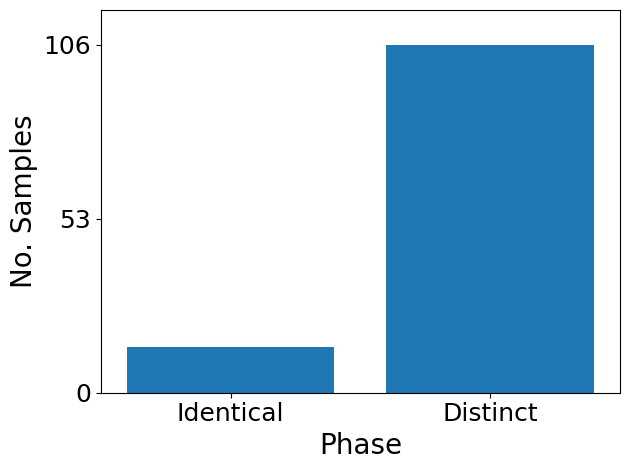

In [25]:
fig = plt.figure()
xticks = ['Identical', 'Distinct']
yticks = [0, int(np.max(group_number)/2), int(np.max(group_number))]

plt.bar(np.arange(len(group_number))+1, group_number)
plt.xticks([1,2], xticks,fontsize=18)
plt.yticks(yticks,fontsize=18)

plt.xlim([0.5,2+0.5])
plt.ylim([0, np.max(group_number)*1.1])

plt.xlabel(r"Phase",fontsize=20)
#plt.ylabel(r"No. Samples",fontsize=20,rotation=90,horizontalalignment='right')
plt.ylabel(r"No. Samples",fontsize=20,rotation=90)
plt.tight_layout()
#plt.savefig('figs_Artin_test_1.svg'.format(n_band))

In [24]:
directory_name = 'Test 1'
if not os.path.exists('./figs/Artin/{directory_name}'.format(directory_name=directory_name)):
    os.mkdir('./figs/Artin/{directory_name}'.format(directory_name=directory_name))

with open('./figs/Artin/{directory_name}/group_number.txt'.format(directory_name=directory_name),'w') as fileop: 
    fileop.write(str(group_number))
    
for i, group in enumerate(groups):
    with open('./figs/Artin/{directory_name}/{i}.txt'.format(directory_name=directory_name, i=i),'w') as fileop: 
        for model in groups[i]:
            fileop.write(str([(op.get_n(), op.get_is_inverse()) for op in model.get_braid_words()])+'\n')

# Test 2

In [39]:
allowed_braid_operator_list = [
    BraidOperator(1), BraidOperator(-1),
    BraidOperator(2), BraidOperator(-2),
    BraidOperator(3), BraidOperator(-3),
    BraidOperator(4), BraidOperator(-4),
]
models = list()
n_sample = 1000
n_max_length = 5
n_allowed_braid_operator_list = len(allowed_braid_operator_list)

for _ in range(n_sample):
    _length = np.random.randint(1, n_allowed_braid_operator_list+1)
    indexs = np.random.choice(range(n_allowed_braid_operator_list), _length)
    braid_operators = braid_operator_list + [allowed_braid_operator_list[index] for index in indexs]
    #braid_operators = [braid_operator_list[index] for index in op_comb]
    models.append(obtain_model_braid(n_band=n_band, braid_operators=braid_operators))
    
# for op_comb in op_combs:
#     braid_operators = [braid_operator_list[index] for index in op_comb]
#     models.append(obtain_model_braid(n_band=n_band, braid_operators=braid_operators))
    
print("The number of models: ",len(models))

The number of models:  1000


In [40]:
fast_mode = True
func = partial(similarity_function, perturbations=perturbations, fast_mode=fast_mode)

groups = [[], []]
for model in models:
    if func(model, model0):
        groups[0].append(model)
    else:
        groups[1].append(model)

group_number = list(map(len, groups))
print("The group number: ",group_number)

The group number:  [18, 982]


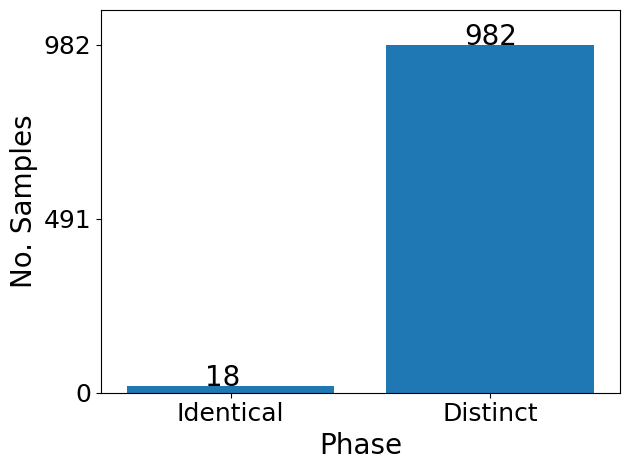

In [65]:
fig = plt.figure()
xticks = ['Identical', 'Distinct']
yticks = [0, int(np.max(group_number)/2), int(np.max(group_number))]

plt.bar(np.arange(len(group_number))+1, group_number)

for i, v in enumerate(group_number):
    plt.text(i+0.9, v, str(v), fontsize=20)
     
plt.xticks([1,2], xticks,fontsize=18)
plt.yticks(yticks,fontsize=18)

plt.xlim([0.5,2+0.5])
plt.ylim([0, np.max(group_number)*1.1])

plt.xlabel(r"Phase",fontsize=20)
#plt.ylabel(r"No. Samples",fontsize=20,rotation=90,horizontalalignment='right')
plt.ylabel(r"No. Samples",fontsize=20,rotation=90)
plt.tight_layout()
#plt.savefig('figs_Artin_test_1.svg'.format(n_band))

In [66]:
directory_name = 'Test 2'
if not os.path.exists('./figs/Artin/{directory_name}'.format(directory_name=directory_name)):
    os.mkdir('./figs/Artin/{directory_name}'.format(directory_name=directory_name))

with open('./figs/Artin/{directory_name}/group_number.txt'.format(directory_name=directory_name),'w') as fileop: 
    fileop.write(str(group_number))
    
for i, group in enumerate(groups):
    with open('./figs/Artin/{directory_name}/{i}.txt'.format(directory_name=directory_name, i=i),'w') as fileop: 
        for model in groups[i]:
            fileop.write(str([(op.get_n(), op.get_is_inverse()) for op in model.get_braid_words()])+'\n')

# Test 3

In [69]:
n_operators = len(braid_operator_list)
op_combs = list(itertools.permutations(range(n_operators), n_operators))

allowed_braid_operator_list = [
    BraidOperator(1), BraidOperator(-1),
    BraidOperator(2), BraidOperator(-2),
    BraidOperator(3), BraidOperator(-3),
    BraidOperator(4), BraidOperator(-4),
]
models = list()
n_sample = 50
n_max_length = 5
n_allowed_braid_operator_list = len(allowed_braid_operator_list)

for op_comb in op_combs:
    braid_operators0 = [braid_operator_list[index] for index in op_comb]
    #models.append(obtain_model_braid(n_band=n_band, braid_operators=braid_operators))
    for _ in range(n_sample):
        _length = np.random.randint(1, n_allowed_braid_operator_list+1)
        indexs = np.random.choice(range(n_allowed_braid_operator_list), _length)
        braid_operators = braid_operators0 + [allowed_braid_operator_list[index] for index in indexs]
        #braid_operators = [braid_operator_list[index] for index in op_comb]
        models.append(obtain_model_braid(n_band=n_band, braid_operators=braid_operators))
    
# for op_comb in op_combs:
#     braid_operators = [braid_operator_list[index] for index in op_comb]
#     models.append(obtain_model_braid(n_band=n_band, braid_operators=braid_operators))
    
print("The number of models: ",len(models))

The number of models:  6000


In [70]:
fast_mode = True
func = partial(similarity_function, perturbations=perturbations, fast_mode=fast_mode)

groups = [[], []]
for model in models:
    if func(model, model0):
        groups[0].append(model)
    else:
        groups[1].append(model)

group_number = list(map(len, groups))
print("The group number: ",group_number)

The group number:  [21, 5979]


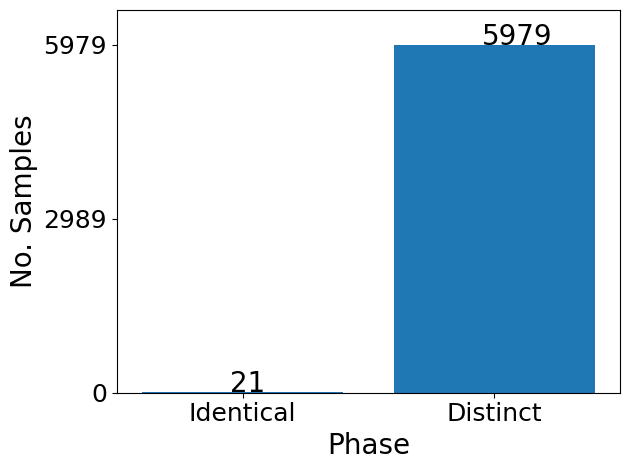

In [72]:
fig = plt.figure()
xticks = ['Identical', 'Distinct']
yticks = [0, int(np.max(group_number)/2), int(np.max(group_number))]

plt.bar(np.arange(len(group_number))+1, group_number)

for i, v in enumerate(group_number):
    plt.text(i+0.95, v, str(v), fontsize=20)
     
plt.xticks([1,2], xticks,fontsize=18)
plt.yticks(yticks,fontsize=18)

plt.xlim([0.5,2+0.5])
plt.ylim([0, np.max(group_number)*1.1])

plt.xlabel(r"Phase",fontsize=20)
#plt.ylabel(r"No. Samples",fontsize=20,rotation=90,horizontalalignment='right')
plt.ylabel(r"No. Samples",fontsize=20,rotation=90)
plt.tight_layout()
#plt.savefig('figs_Artin_test_1.svg'.format(n_band))

In [73]:
directory_name = 'Test 3'
if not os.path.exists('./figs/Artin/{directory_name}'.format(directory_name=directory_name)):
    os.mkdir('./figs/Artin/{directory_name}'.format(directory_name=directory_name))

with open('./figs/Artin/{directory_name}/group_number.txt'.format(directory_name=directory_name),'w') as fileop: 
    fileop.write(str(group_number))
    
for i, group in enumerate(groups):
    with open('./figs/Artin/{directory_name}/{i}.txt'.format(directory_name=directory_name, i=i),'w') as fileop: 
        for model in groups[i]:
            fileop.write(str([(op.get_n(), op.get_is_inverse()) for op in model.get_braid_words()])+'\n')